In [1]:
import os
import datasets
from transformers import VisionEncoderDecoderModel, AutoFeatureExtractor,AutoTokenizer
os.environ["WANDB_DISABLED"] = "true"


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import nltk
try:
    nltk.data.find("tokenizers/punkt")
except (LookupError, OSError):
    nltk.download("punkt", quiet=True)

In [3]:
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoFeatureExtractor, AutoImageProcessor

image_encoder_model = "Centaur31/vit-base"
text_decode_model = "gpt2"

model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    image_encoder_model, text_decode_model)

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.8.ln_cross_attn.weight', 'h.8.crossattention.q_attn.bias', 'h.9.crossattention.q_attn.bias', 'h.4.crossattention.c_attn.bias', 'h.10.crossattention.c_proj.weight', 'h.5.ln_cross_attn.bias', 'h.10.crossattention.q_attn.bias', 'h.4.crossattention.c_proj.bias', 'h.5.crossattention.c_attn.weight', 'h.6.crossattention.c_proj.bias', 'h.0.crossattention.c_attn.weight', 'h.4.crossattention.c_proj.weight', 'h.3.crossattention.q_attn.weight', 'h.10.crossattention.c_attn.weight', 'h.1.crossattention.c_attn.weight', 'h.8.ln_cross_attn.bias', 'h.5.crossattention.c_attn.bias', 'h.5.ln_cross_attn.weight', 'h.6.crossattention.c_proj.weight', 'h.2.ln_cross_attn.bias', 'h.6.ln_cross_attn.weight', 'h.5.crossattention.c_proj.weight', 'h.11.crossattention.c_attn.bias', 'h.10.ln_cross_attn.bias', 'h.8.crossattention.c_attn.weight', 'h.4.crossattention.q_attn.weight', 'h.9.ln_cross_attn.bias'

In [4]:
# image feature extractor
feature_extractor = AutoImageProcessor.from_pretrained(image_encoder_model)
# text tokenizer
tokenizer = AutoTokenizer.from_pretrained(text_decode_model)

In [5]:
# GPT2 only has bos/eos tokens but not decoder_start/pad tokens
tokenizer.pad_token = tokenizer.eos_token

# update the model config
model.config.eos_token_id = tokenizer.eos_token_id
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.pad_token_id = tokenizer.pad_token_id

In [6]:
model.encoder.embeddings.patch_embeddings.projection

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [7]:
output_dir = "vit-gpt-model"
model.save_pretrained(output_dir)
feature_extractor.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('vit-gpt-model/tokenizer_config.json',
 'vit-gpt-model/special_tokens_map.json',
 'vit-gpt-model/vocab.json',
 'vit-gpt-model/merges.txt',
 'vit-gpt-model/added_tokens.json',
 'vit-gpt-model/tokenizer.json')

In [20]:
# import pandas as pd

# # Replace 'your_dataset.csv' with the actual name of your CSV file
# val_file_path = 'val_output1.csv'
# file_path = 'output.csv'
# # Load the dataset from the CSV file into a pandas DataFrame
# val_dataset = pd.read_csv(val_file_path)
# dataset = pd.read_csv(file_path)
# # Display the first few rows of the DataFrame to inspect the loaded data
# dict_data = dataset.to_dict(orient='records')

1550

In [8]:
import os

def list_items_in_folder(folder_path):
    items_list = []

    # Iterate over each item (files or directories) in the folder
    for item in os.listdir(folder_path):
        # Get the full path of the item
        item_path = os.path.join(folder_path, item)
        # Append the item's path to the list
        items_list.append(item_path)

    return items_list

# Replace 'folder_path' with the path to the folder you want to read
folder_path = '/home/vcl3d/coco_dataset_VOX_5000/train2014'
items_list = list_items_in_folder(folder_path)
items_list = sorted(items_list)
# Print the list of items in the folder
print(items_list)

['/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000009.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000025.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000030.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000034.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000036.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000049.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000061.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000064.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000071.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000072.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000077.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000078.jpg', '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_t

In [9]:
#EVALUATION 
import os

def list_items_in_folder(folder_path):
    items_list = []

    # Iterate over each item (files or directories) in the folder
    for item in os.listdir(folder_path):
        # Get the full path of the item
        item_path = os.path.join(folder_path, item)
        # Append the item's path to the list
        items_list.append(item_path)

    return items_list

# Replace 'folder_path' with the path to the folder you want to read
val_folder_path = '/home/vcl3d/coco_dataset_VOX_5000/val2014'
val_items_list = list_items_in_folder(val_folder_path)
val_items_list=sorted(val_items_list)

# Print the list of items in the folder
print(val_items_list)

['/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000042.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000073.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000074.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000133.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000136.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000139.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000143.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000164.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000192.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000196.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000208.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000241.jpg', '/home/vcl3d/coco_dataset_VOX_5000/val2014/COCO_val2014_000000000257.jpg', '/home/vcl3d/coco_datase

In [10]:
# #DEPTH
# depth_path = '/home/vcl3d/coco_dataset_VOX_mini/train2014_d'
# depth_list = list_items_in_folder(depth_path)
# depth_list = sorted(depth_list)
# print(depth_list)

In [11]:
# #VAL_DEPTH
# val_depth_path = '/home/vcl3d/coco_dataset_VOX_mini/val2014_d'
# val_depth_list = list_items_in_folder(val_depth_path)
# val_depth_list = sorted(val_depth_list)
# print(val_depth_list)

In [12]:
from datasets import load_dataset, Image, Dataset
data = {"image": items_list}
# Step 3: Convert the list to a Dataset object
dataset = Dataset.from_dict(data)

# Step 4: Cast the "image" column to the Image() type
dataset = dataset.cast_column("image", Image())

In [13]:
# #DEPTH
# depth_data = {"image": depth_list}
# # Step 3: Convert the list to a Dataset object
# depth_dataset = Dataset.from_dict(depth_data)

# # Step 4: Cast the "image" column to the Image() type
# depth_dataset = depth_dataset.cast_column("image", Image())


In [14]:
# #VAL_DEPTH
# val_depth_data = {"image": val_depth_list}
# # Step 3: Convert the list to a Dataset object
# val_depth_dataset = Dataset.from_dict(val_depth_data)

# # Step 4: Cast the "image" column to the Image() type
# val_depth_dataset = val_depth_dataset.cast_column("image", Image())

In [15]:
#EVALUATION
from datasets import load_dataset, Image, Dataset
val_data = {"image": val_items_list}
# Step 3: Convert the list to a Dataset object
val_dataset = Dataset.from_dict(val_data)

# Step 4: Cast the "image" column to the Image() type
val_dataset = val_dataset.cast_column("image", Image())

In [16]:
heights_list = []
widths_list = []
image_id_counter = 0
text_id_counter = 0
image_id_list = []
text_id_list = []
# Loop through the 'image' column of the dataset
for image in dataset['image']:
    # Get the height and width of the current image
    height, width = image.size

    # Append the height and width to their respective lists
    heights_list.append(height)
    widths_list.append(width)
    image_id = image_id_counter
    image_id_list.append(image_id)
    image_id_counter += 1
# Print the lists of heights and widths
print("List of Heights:", heights_list)
print("List of Widths:", widths_list)

List of Heights: [640, 640, 640, 640, 481, 381, 640, 480, 640, 427, 500, 612, 640, 640, 640, 640, 640, 640, 416, 640, 640, 480, 640, 640, 480, 427, 640, 640, 640, 640, 640, 500, 591, 640, 640, 600, 640, 640, 640, 640, 640, 640, 640, 480, 480, 640, 446, 640, 640, 426, 640, 640, 427, 640, 640, 480, 640, 640, 500, 500, 640, 640, 360, 427, 640, 640, 640, 640, 460, 423, 427, 640, 473, 640, 640, 640, 640, 640, 480, 640, 640, 427, 500, 640, 640, 640, 640, 640, 640, 480, 612, 640, 428, 500, 640, 640, 359, 640, 640, 426, 429, 640, 612, 640, 500, 640, 640, 640, 640, 640, 640, 640, 640, 640, 460, 640, 612, 327, 640, 392, 612, 640, 500, 640, 480, 427, 640, 640, 480, 480, 480, 427, 640, 640, 640, 612, 640, 640, 640, 640, 640, 443, 640, 640, 424, 640, 640, 640, 640, 427, 640, 640, 500, 500, 640, 640, 480, 480, 480, 640, 640, 640, 640, 640, 640, 640, 640, 426, 480, 640, 500, 480, 640, 640, 480, 518, 640, 480, 640, 640, 427, 612, 500, 640, 640, 640, 640, 480, 640, 354, 640, 428, 640, 640, 640, 640, 60

In [17]:
#EVALUATION
val_heights_list = []
val_widths_list = []
val_image_id_counter = 0
val_text_id_counter = 0
val_image_id_list = []
val_text_id_list = []
# Loop through the 'image' column of the dataset
for image in val_dataset['image']:
    # Get the height and width of the current image
    val_height, val_width = image.size

    # Append the height and width to their respective lists
    val_heights_list.append(val_height)
    val_widths_list.append(val_width)
    val_image_id = val_image_id_counter
    val_image_id_list.append(val_image_id)
    val_image_id_counter += 1
# Print the lists of heights and widths
print("List of Heights:", val_heights_list)
print("List of Widths:", val_widths_list)

List of Heights: [640, 565, 640, 640, 500, 640, 600, 640, 640, 640, 640, 480, 640, 428, 586, 640, 640, 640, 640, 500, 500, 640, 640, 640, 638, 359, 640, 516, 640, 333, 640, 640, 640, 640, 448, 640, 520, 640, 640, 409, 640, 375, 640, 640, 480, 640, 500, 640, 640, 640, 400, 640, 640, 375, 640, 640, 640, 500, 640, 640, 428, 640, 424, 640, 500, 333, 500, 621, 502, 640, 640, 640, 427, 425, 334, 640, 640, 640, 640, 443, 480, 500, 640, 640, 640, 500, 427, 640, 500, 640, 640, 426, 426, 640, 640, 640, 640, 640, 640, 640, 427, 500, 640, 500, 375, 640, 640, 437, 407, 478, 640, 500, 640, 500, 640, 640, 320, 640, 640, 640, 640, 435, 640, 424, 612, 480, 640, 425, 640, 500, 480, 640, 424, 640, 640, 640, 640, 640, 640, 523, 427, 500, 640, 500, 640, 640, 500, 427, 640, 640, 500, 383, 427, 427, 500, 640, 640, 640, 360, 640, 640, 500, 640, 640, 640, 640, 640, 640, 640, 640, 640, 500, 640, 640, 600, 640, 640, 480, 640, 500, 640, 640, 640, 500, 457, 640, 640, 640, 500, 612, 500, 640, 375, 480, 640, 500, 64

In [18]:
# #DEPTH
# depth_heights_list = []
# depth_widths_list = []
# depth_image_id_counter = 0
# depth_text_id_counter = 0
# depth_image_id_list = []
# depth_text_id_list = []
# # Loop through the 'image' column of the dataset
# for image in depth_dataset['image']:
#     # Get the height and width of the current image
#     depth_height, depth_width = image.size

#     # Append the height and width to their respective lists
#     depth_heights_list.append(depth_height)
#     depth_widths_list.append(depth_width)
#     depth_image_id = depth_image_id_counter
#     depth_image_id_list.append(depth_image_id)
#     depth_image_id_counter += 1
# # Print the lists of heights and widths
# print("List of Heights:", depth_heights_list)
# print("List of Widths:", depth_widths_list)

In [19]:
# #VAL_DEPTH
# val_depth_heights_list = []
# val_depth_widths_list = []
# val_depth_image_id_counter = 0
# val_depth_text_id_counter = 0
# val_depth_image_id_list = []
# val_depth_text_id_list = []
# # Loop through the 'image' column of the dataset
# for image in val_depth_dataset['image']:
#     # Get the height and width of the current image
#     val_depth_height, val_depth_width = image.size

#     # Append the height and width to their respective lists
#     val_depth_heights_list.append(val_depth_height)
#     val_depth_widths_list.append(val_depth_width)
#     val_depth_image_id = val_depth_image_id_counter
#     val_depth_image_id_list.append(val_depth_image_id)
#     val_depth_image_id_counter += 1
# # Print the lists of heights and widths
# print("List of Heights:", val_depth_heights_list)
# print("List of Widths:", val_depth_widths_list)

In [20]:
import re
def remove_numbers(text_descriptions):
    clean_text_descriptions = []
    for line in text_descriptions:
        clean_text_descriptions.append((re.sub(r'\d+', '', line)).strip())  # Remove digits and leading/trailing spaces
    combined_text = '. '.join(clean_text_descriptions) + '.'  # Add a period at the end
    return combined_text



In [21]:
def limit_words(text, word_limit=200):
    words = text.split()
    if len(words) > word_limit:
        return ' '.join(words[:word_limit]) + '...'  # Add ellipsis if text is truncated
    return text

In [22]:
# #DEPTH
# text_files_path = '/home/vcl3d/coco_dataset_VOX_mini/train2014_desc'
# text_files = [file for file in os.listdir(text_files_path) if file.endswith('_desc.txt')]
# text_files = sorted(text_files)
# #text_files = sorted(text_files[:100])
# # Create a dictionary to store text descriptions with image filenames (without extension) as keys
# text_dict = {}

# # Load text descriptions from each text file and match them with the images
# for text_file in text_files:
#     image_name = os.path.splitext(text_file)[0]
#     text_file_path = os.path.join(text_files_path, text_file)

#     with open(text_file_path, 'r') as file:
#         text_descriptions = file.read().splitlines()

#     text_dict[image_name] = text_descriptions

#     text_descriptions = remove_numbers(text_descriptions)
#     text_dict[image_name] = text_descriptions
# # Convert image paths to strings by extracting the file name from the full path
# image_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] for image_path in depth_dataset["image"]]
# text_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] + '_desc'  for image_path in dataset["image"]]
# # Add the "text" column to the dimg dataset
# depth_dataset = depth_dataset.add_column("text", [text_dict[filename] for filename in text_filenames])
# depth_dataset = depth_dataset.add_column("image_path", depth_list)
# depth_dataset = depth_dataset.add_column("height", depth_heights_list)
# depth_dataset = depth_dataset.add_column("width", depth_widths_list)
# depth_dataset = depth_dataset.add_column("image_id", depth_image_id_list)
# #dataset = dataset.add_column("caption_id", text_id_list)
# # Print the resulting dataset with image paths and text descriptions
# #text_dict['COCO_train2014_000000000049_desc']
# depth_dataset = depth_dataset.add_column("file_name", image_filenames)

In [23]:
# #VAL_DEPTH
# text_files_path = '/home/vcl3d/coco_dataset_VOX_mini/val2014_desc'
# text_files = [file for file in os.listdir(text_files_path) if file.endswith('_desc.txt')]
# text_files = sorted(text_files)
# #text_files = sorted(text_files[:100])
# # Create a dictionary to store text descriptions with image filenames (without extension) as keys
# text_dict = {}

# # Load text descriptions from each text file and match them with the images
# for text_file in text_files:
#     image_name = os.path.splitext(text_file)[0]
#     text_file_path = os.path.join(text_files_path, text_file)

#     with open(text_file_path, 'r') as file:
#         text_descriptions = file.read().splitlines()

#     text_dict[image_name] = text_descriptions

#     text_descriptions = remove_numbers(text_descriptions)
#     text_dict[image_name] = text_descriptions
# # Convert image paths to strings by extracting the file name from the full path
# image_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] for image_path in val_depth_dataset["image"]]
# text_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] + '_desc'  for image_path in val_dataset["image"]]
# # Add the "text" column to the dimg dataset
# val_depth_dataset = val_depth_dataset.add_column("text", [text_dict[filename] for filename in text_filenames])
# val_depth_dataset = val_depth_dataset.add_column("image_path", val_depth_list)
# val_depth_dataset = val_depth_dataset.add_column("height", val_depth_heights_list)
# val_depth_dataset = val_depth_dataset.add_column("width", val_depth_widths_list)
# val_depth_dataset = val_depth_dataset.add_column("image_id", val_depth_image_id_list)
# #dataset = dataset.add_column("caption_id", text_id_list)
# # Print the resulting dataset with image paths and text descriptions
# #text_dict['COCO_train2014_000000000049_desc']
# val_depth_dataset = val_depth_dataset.add_column("file_name", image_filenames)

In [24]:
text_files_path = '/home/vcl3d/coco_dataset_VOX_5000/train2014_desc'
text_files = [file for file in os.listdir(text_files_path) if file.endswith('_desc.txt')]
text_files = sorted(text_files)
#text_files = sorted(text_files[:100])
# Create a dictionary to store text descriptions with image filenames (without extension) as keys
text_dict = {}

# Load text descriptions from each text file and match them with the images
for text_file in text_files:
    image_name = os.path.splitext(text_file)[0]
    text_file_path = os.path.join(text_files_path, text_file)

    with open(text_file_path, 'r') as file:
        text_descriptions = file.read().splitlines()

    text_dict[image_name] = text_descriptions

    text_descriptions = remove_numbers(text_descriptions)
    text_descriptions = limit_words(text_descriptions , word_limit=50)
    text_dict[image_name] = text_descriptions
# Convert image paths to strings by extracting the file name from the full path
image_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] for image_path in dataset["image"]]
text_filenames = [os.path.splitext(os.path.basename(image_path.filename))[0] + '_desc'  for image_path in dataset["image"]]
# Add the "text" column to the dimg dataset
dataset = dataset.add_column("caption", [text_dict[filename] for filename in text_filenames])
dataset = dataset.add_column("image_path", items_list)
dataset = dataset.add_column("height", heights_list)
dataset = dataset.add_column("width", widths_list)
dataset = dataset.add_column("image_id", image_id_list)
#dataset = dataset.add_column("caption_id", text_id_list)
# Print the resulting dataset with image paths and text descriptions
#text_dict['COCO_train2014_000000000049_desc']
dataset = dataset.add_column("file_name", image_filenames)

In [25]:
#EVALUATION
val_text_files_path = '/home/vcl3d/coco_dataset_VOX_5000/val2014_desc'
val_text_files = [file for file in os.listdir(val_text_files_path) if file.endswith('_desc.txt')]
val_text_files = sorted(val_text_files)
#val_text_files = sorted(val_text_files[:100])

# Create a dictionary to store text descriptions with image filenames (without extension) as keys
val_text_dict = {}

# Load text descriptions from each text file and match them with the images
for text_file in val_text_files:
    val_image_name = os.path.splitext(text_file)[0]
    val_text_file_path = os.path.join(val_text_files_path, text_file)

    with open(val_text_file_path, 'r') as file:
        val_text_descriptions = file.read().splitlines()

    val_text_dict[val_image_name] = val_text_descriptions

    val_text_descriptions = remove_numbers(val_text_descriptions)
    val_text_descriptions = limit_words(val_text_descriptions , word_limit=50)
    val_text_dict[val_image_name] = val_text_descriptions

# Convert image paths to strings by extracting the file name from the full path
val_image_filenames = [os.path.splitext(os.path.basename(val_image_path.filename))[0] for val_image_path in val_dataset["image"]]
val_text_filenames = [os.path.splitext(os.path.basename(val_image_path.filename))[0] + '_desc'  for val_image_path in val_dataset["image"]]
# Add the "text" column to the dimg dataset
val_dataset = val_dataset.add_column("caption", [val_text_dict[filename] for filename in val_text_filenames])
val_dataset = val_dataset.add_column("image_path", val_items_list)
val_dataset = val_dataset.add_column("height", val_heights_list)
val_dataset = val_dataset.add_column("width", val_widths_list)
val_dataset = val_dataset.add_column("image_id", val_image_id_list)
#dataset = dataset.add_column("caption_id", text_id_list)
# Print the resulting dataset with image paths and text descriptions
#text_dict['COCO_train2014_000000000049_desc']
val_dataset = val_dataset.add_column("file_name", val_image_filenames)

In [26]:
len(dataset["image_id"])

5000

In [27]:
dataset[5]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=381x500>,
 'caption': 'The potted plant is bellow the horse. The horse is above the potted plant. The potted plant is in front of the horse. The horse is behind the potted plant. The potted plant is to the right of the horse. The horse is to the left of the potted plant....',
 'image_path': '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000049.jpg',
 'height': 381,
 'width': 500,
 'image_id': 5,
 'file_name': 'COCO_train2014_000000000049'}

In [28]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [29]:
# from datasets import Dataset
# from PIL import Image as PILImage
# import numpy as np
# import pandas as pd

# image_list = []
# text_list = []
# file_name_list = []
# path_list = []
# heights_list = []
# widths_list = []
# image_id_list = []
# text_id_list = []

# image_id_counter = 0
# text_id_counter = 0

# # Iterate over the rows of the original dataset
# for row in dataset:
#     image = row['image']
#     text_descriptions = row['text']
#     file_name = row['file_name']
#     image_path = row['image_path']
#     height = row['height']
#     width = row['width']
#     image_id = row['image_id']

#     image_np = np.array(image)
#     image_bytes = image_np.tobytes()
#     # Count the occurrences of each unique text description
#     unique_texts = set(text_descriptions)
#     for text in unique_texts:
#         count = text_descriptions.count(text)
#         # Duplicate the image, text, and file_name for the number of occurrences
#         for _ in range(count):
#             image_list.append(image_bytes)
#             text_list.append(text)
#             file_name_list.append(file_name)
#             path_list.append(image_path)
#             heights_list.append(height)
#             widths_list.append(width)
#             image_id_list.append(image_id)
#             text_id_list.append(text_id_counter)
#             text_id_counter += 1
# data_dict = {
#     'image_id' : image_id_list,
#     'caption_id': text_id_list,
#     #'image': image_list,
#     'caption': text_list,
#     'height': heights_list,
#     'width': widths_list,
#     'file_name': file_name_list,
#     'coco_url': path_list,
#     'image_path': path_list
# }
# df = pd.DataFrame(data_dict)
# # Create the new dataset with the expanded instances
# new_dataset = Dataset.from_pandas(df)

# # Print the new dataset
# print(new_dataset)


In [30]:
# #DEPTH
# from datasets import Dataset
# from PIL import Image as PILImage
# import numpy as np
# import pandas as pd

# depth_image_list = []
# depth_text_list = []
# depth_file_name_list = []
# depth_path_list = []
# depth_heights_list = []
# depth_widths_list = []
# depth_image_id_list = []
# depth_text_id_list = []

# depth_image_id_counter = 0
# depth_text_id_counter = 0

# # Iterate over the rows of the original dataset
# for row in depth_dataset:
#     depth_image = row['image']
#     depth_text_descriptions = row['text']
#     depth_file_name = row['file_name']
#     depth_image_path = row['image_path']
#     depth_height = row['height']
#     depth_width = row['width']
#     depth_image_id = row['image_id']

#     image_np = np.array(depth_image)
#     depth_image_bytes = image_np.tobytes()
#     # Count the occurrences of each unique text description
#     unique_texts = set(depth_text_descriptions)
#     for depth_text in unique_texts:
#         count = depth_text_descriptions.count(depth_text)
#         # Duplicate the image, text, and file_name for the number of occurrences
#         for _ in range(count):
#             depth_image_list.append(depth_image_bytes)
#             depth_text_list.append(depth_text)
#             depth_file_name_list.append(depth_file_name)
#             depth_path_list.append(depth_image_path)
#             depth_heights_list.append(depth_height)
#             depth_widths_list.append(depth_width)
#             depth_image_id_list.append(depth_image_id)
#             depth_text_id_list.append(depth_text_id_counter)
#             depth_text_id_counter += 1
# depth_data_dict = {
#     'image_id' : depth_image_id_list,
#     'caption_id': depth_text_id_list,
#     #'image': image_list,
#     'caption': depth_text_list,
#     'height': depth_heights_list,
#     'width': depth_widths_list,
#     'file_name': depth_file_name_list,
#     'coco_url': depth_path_list,
#     'image_path': depth_path_list
# }
# depth_df = pd.DataFrame(depth_data_dict)
# # Create the new dataset with the expanded instances
# depth_dataset = Dataset.from_pandas(depth_df)

# # Print the new dataset
# print(depth_dataset)


In [31]:
# #VAL_DEPTH
# from datasets import Dataset
# from PIL import Image as PILImage
# import numpy as np
# import pandas as pd

# val_depth_image_list = []
# val_depth_text_list = []
# val_depth_file_name_list = []
# val_depth_path_list = []
# val_depth_heights_list = []
# val_depth_widths_list = []
# val_depth_image_id_list = []
# val_depth_text_id_list = []

# val_depth_image_id_counter = 0
# val_depth_text_id_counter = 0

# # Iterate over the rows of the original dataset
# for row in val_depth_dataset:
#     val_depth_image = row['image']
#     val_depth_text_descriptions = row['text']
#     val_depth_file_name = row['file_name']
#     val_depth_image_path = row['image_path']
#     val_depth_height = row['height']
#     val_depth_width = row['width']
#     val_depth_image_id = row['image_id']

#     image_np = np.array(val_depth_image)
#     val_depth_image_bytes = image_np.tobytes()
#     # Count the occurrences of each unique text description
#     unique_texts = set(val_depth_text_descriptions)
#     for val_depth_text in unique_texts:
#         count = val_depth_text_descriptions.count(val_depth_text)
#         # Duplicate the image, text, and file_name for the number of occurrences
#         for _ in range(count):
#             val_depth_image_list.append(val_depth_image_bytes)
#             val_depth_text_list.append(val_depth_text)
#             val_depth_file_name_list.append(val_depth_file_name)
#             val_depth_path_list.append(val_depth_image_path)
#             val_depth_heights_list.append(val_depth_height)
#             val_depth_widths_list.append(val_depth_width)
#             val_depth_image_id_list.append(val_depth_image_id)
#             val_depth_text_id_list.append(val_depth_text_id_counter)
#             val_depth_text_id_counter += 1
# val_depth_data_dict = {
#     'image_id' : val_depth_image_id_list,
#     'caption_id': val_depth_text_id_list,
#     #'image': image_list,
#     'caption': val_depth_text_list,
#     'height': val_depth_heights_list,
#     'width': val_depth_widths_list,
#     'file_name': val_depth_file_name_list,
#     'coco_url': val_depth_path_list,
#     'image_path': val_depth_path_list
# }
# val_depth_df = pd.DataFrame(val_depth_data_dict)
# # Create the new dataset with the expanded instances
# val_depth_dataset = Dataset.from_pandas(val_depth_df)

# # Print the new dataset
# print(val_depth_dataset)


In [32]:
# #EVALUATION
# from datasets import Dataset
# from PIL import Image as PILImage
# import numpy as np
# import pandas as pd
# # Assuming you already have the dataset with the format you provided
# val_image_list = []
# val_text_list = []
# val_file_name_list = []
# val_path_list = []
# val_heights_list = []
# val_widths_list = []
# val_image_id_list = []
# val_text_id_list = []

# val_image_id_counter = 0
# val_text_id_counter = 0

# # Iterate over the rows of the original dataset
# for row in val_dataset:
#     image = row['image']
#     text_descriptions = row['text']
#     file_name = row['file_name']
#     image_path = row['image_path']
#     height = row['height']
#     width = row['width']
#     image_id = row['image_id']

#     image_np = np.array(image)
#     image_bytes = image_np.tobytes()
#     # Count the occurrences of each unique text description
#     unique_texts = set(text_descriptions)
#     for text in unique_texts:
#         count = text_descriptions.count(text)
#         # Duplicate the image, text, and file_name for the number of occurrences
#         for _ in range(count):
#             val_image_list.append(image_bytes)
#             val_text_list.append(text)
#             val_file_name_list.append(file_name)
#             val_path_list.append(image_path)
#             val_heights_list.append(height)
#             val_widths_list.append(width)
#             val_image_id_list.append(image_id)
#             val_text_id_list.append(text_id_counter)
#             val_text_id_counter += 1
# val_data_dict = {
#     'image_id' : val_image_id_list,
#     'caption_id': val_text_id_list,
#     #'image': image_list,
#     'caption': val_text_list,
#     'height': val_heights_list,
#     'width': val_widths_list,
#     'file_name': val_file_name_list,
#     'coco_url': val_path_list,
#     'image_path': val_path_list
# }
# val_df = pd.DataFrame(val_data_dict)
# # Create the new dataset with the expanded instances
# new_val_dataset = Dataset.from_pandas(val_df)

# # Print the new dataset
# print(new_val_dataset)


In [33]:
# #DEPTH
# depth_dataset

In [34]:
# #VAL_DEPTH
# val_depth_dataset

In [35]:
#EVALUATION
#new_val_dataset

In [36]:
#new_dataset

In [37]:
from PIL import Image

# text preprocessing step
def tokenization_fn(captions, max_target_length):
    """Run tokenization on captions."""
    labels = tokenizer(captions,
                      padding="max_length",
                      max_length=max_target_length).input_ids

    return labels


# image preprocessing step
def feature_extraction_fn(image_paths, check_image=True):
    """
    Run feature extraction on images
    If `check_image` is `True`, the examples that fails during `Image.open()` will be caught and discarded.
    Otherwise, an exception will be thrown.
    """

    if check_image==False:
        images = []
        to_keep = []
        for image_file in image_paths:
            try:
                img = Image.open(image_file)
                #if img.mode != 'RGB':
                   #img = img.convert('RGB')
                images.append(img)
                to_keep.append(True)               
            except Exception:
                to_keep.append(False)
    else:
        images = [Image.open(image_file) for image_file in image_paths]

    encoder_inputs = feature_extractor(images=images, return_tensors="np")

    return encoder_inputs.pixel_values
    #     #images = [Image.open(image_file) for image_file in image_paths]
    #     processed_images = []
    #     for image_file in sorted(glob.glob(f"{image_paths}/*.JPG")): #image_paths:
    #         with Image.open(image_file) as img:
    #             processed_images.append(img)
                
    # # Use feature_extractor to obtain encoder inputs
    #     encoder_inputs = feature_extractor(images=processed_images, return_tensors="pt")
    # #encoder_inputs = feature_extractor(images=images, return_tensors="np")

    #return encoder_inputs.pixel_values

def preprocess_fn(examples, max_target_length, check_image = True):
    """Run tokenization + image feature extraction"""
    image_paths = examples['image_path']
    captions = examples['caption']
    model_inputs = {}
    # This contains image path column
    model_inputs['labels'] = tokenization_fn(captions, max_target_length)
    model_inputs['pixel_values'] = feature_extraction_fn(image_paths, check_image=check_image)

    return model_inputs

In [38]:
# depth_images = []
# to_keep = []
# for image_file in depth_list:
#             try:
#                 img = Image.open(image_file)
#                 depth_images.append(img)
#                 to_keep.append(True)
#             except Exception:
#                 to_keep.append(False)
# else:
#     depth_images = [Image.open(image_file) for image_file in depth_list]

In [39]:
# depth_images[1].getbands()

In [40]:
# import cv2

# # Load an image from file
# image = cv2.imread(depth_list[1], cv2.IMREAD_GRAYSCALE)

# # Check the pixel value at a specific location (e.g., row 100, column 200)
# pixel_value = image[240, 255]
# print(f'Pixel value at (100, 200): {pixel_value}')

# # Check the shape of the image (height, width, number of channels)
# height, width = image.shape
# print(f'Image shape: Height={height}, Width={width}')


In [41]:
# for image_file in depth_list:
#     d_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

In [42]:
dataset[3]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x425>,
 'caption': '.',
 'image_path': '/home/vcl3d/coco_dataset_VOX_5000/train2014/COCO_train2014_000000000034.jpg',
 'height': 640,
 'width': 425,
 'image_id': 3,
 'file_name': 'COCO_train2014_000000000034'}

In [43]:
preprocess_fn(dataset, 15, check_image = True)


{'labels': [[464,
   9396,
   318,
   8966,
   322,
   262,
   9396,
   13,
   383,
   9396,
   318,
   2029,
   262,
   9396,
   13,
   383,
   9396,
   318,
   287,
   2166,
   286,
   262,
   9396,
   13,
   383,
   9396,
   318,
   2157,
   262,
   9396,
   13,
   383,
   44653,
   318,
   8966,
   322,
   262,
   9396,
   13,
   383,
   9396,
   318,
   2029,
   262,
   44653,
   13,
   383,
   44653,
   318,
   287,
   2166,
   286,
   262,
   9396,
   13,
   383,
   9396,
   318,
   2157,
   986],
  [464,
   37370,
   21223,
   318,
   284,
   262,
   826,
   286,
   262,
   37370,
   21223,
   13,
   383,
   37370,
   21223,
   318,
   284,
   262,
   1364,
   286,
   262,
   37370,
   21223,
   13,
   383,
   37370,
   21223,
   318,
   8966,
   322,
   262,
   37370,
   21223,
   13,
   383,
   37370,
   21223,
   318,
   2029,
   262,
   37370,
   21223,
   13],
  [13,
   50256,
   50256,
   50256,
   50256,
   50256,
   50256,
   50256,
   50256,
   50256,
   50256,
   5025

In [44]:
processed_dataset = dataset.map(
    function=preprocess_fn,
    batched=True,
    fn_kwargs={"max_target_length": 200},
    #remove_columns=dataset.column_names
)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [45]:
# #DEPTH
# preprocess_fn(depth_dataset, 128, check_image = True)

In [46]:
# #VAL_DEPTH
# preprocess_fn(val_depth_dataset, 128, check_image = True)

In [47]:
#EVALUATION
preprocess_fn(val_dataset, 15, check_image = True)

{'labels': [[464,
   3290,
   318,
   284,
   262,
   826,
   286,
   262,
   5701,
   2613,
   13,
   383,
   5701,
   2613,
   318,
   284,
   262,
   1364,
   286,
   262,
   3290,
   13],
  [464,
   18757,
   318,
   287,
   2166,
   286,
   262,
   18757,
   13,
   383,
   18757,
   318,
   2157,
   262,
   18757,
   13],
  [464,
   17026,
   318,
   287,
   2166,
   286,
   262,
   1048,
   13,
   383,
   1048,
   318,
   2157,
   262,
   17026,
   13,
   383,
   17026,
   318,
   287,
   2166,
   286,
   262,
   1048,
   13,
   383,
   1048,
   318,
   2157,
   262,
   17026,
   13,
   383,
   17026,
   318,
   287,
   2166,
   286,
   262,
   1048,
   13,
   383,
   1048,
   318,
   2157,
   262,
   17026,
   13,
   383,
   17026,
   318,
   287,
   2166,
   286,
   262,
   1048,
   1106],
  [464,
   3996,
   318,
   8966,
   322,
   262,
   256,
   21874,
   6842,
   13,
   383,
   256,
   21874,
   6842,
   318,
   2029,
   262,
   3996,
   13],
  [464,
   37370,
   21223,
  

In [48]:
#EVALUATION
val_processed_dataset = val_dataset.map(
    function=preprocess_fn,
    batched=True,
    fn_kwargs={"max_target_length": 200},
    #remove_columns=val_dataset.column_names
)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [49]:
processed_dataset

Dataset({
    features: ['image', 'caption', 'image_path', 'height', 'width', 'image_id', 'file_name', 'labels', 'pixel_values'],
    num_rows: 5000
})

In [50]:
val_processed_dataset

Dataset({
    features: ['image', 'caption', 'image_path', 'height', 'width', 'image_id', 'file_name', 'labels', 'pixel_values'],
    num_rows: 5000
})

In [51]:
# #DEPTH
# depth_processed_dataset = depth_dataset.map(
#     function=preprocess_fn,
#     batched=True,
#     fn_kwargs={"max_target_length": 128},
#     #remove_columns=new_dataset.column_names
# )

In [52]:
# #VAL_DEPTH
# val_depth_processed_dataset = val_depth_dataset.map(
#     function=preprocess_fn,
#     batched=True,
#     fn_kwargs={"max_target_length": 128},
#     #remove_columns=new_dataset.column_names
# )

In [53]:
#pixel_values1 = np.array(processed_dataset['pixel_values'])
#pixel_values2 = np.array(depth_processed_dataset['pixel_values'])

In [54]:
#pixel_values2.shape

In [55]:
#depth_layer = np.zeros((pixel_values2.shape[0], 1, pixel_values2.shape[2], pixel_values2.shape[3]))
#depth_layer

In [56]:
#pixel_values2_with_depth = np.concatenate([pixel_values2, depth_layer], axis=1)

In [57]:
#print(pixel_values2_with_depth.shape)

In [58]:
# depth_values = np.array(depth_processed_dataset['pixel_values'])


In [59]:
# val_depth_values = np.array(val_depth_processed_dataset['pixel_values'])

In [60]:
#rbg_values = np.array(processed_dataset['pixel_values'])

In [61]:
#val_rbg_values = np.array(val_processed_dataset['pixel_values'])

In [62]:
# depth_values.shape

In [63]:
#len(rbg_values)

In [64]:
#rbg_values.shape

In [65]:
#rbg_values[1][0]

In [66]:
# new_pixel_values = np.concatenate((rbg_values, depth_values), axis=1)


In [67]:
# new_val_pixel_values = np.concatenate((val_rbg_values, val_depth_values), axis=1)

In [68]:
# new_pixel_values = new_pixel_values[:, :4, :, :]
# new_pixel_values.shape

In [69]:
# new_val_pixel_values = new_val_pixel_values[:, :4, :, :]
# new_val_pixel_values.shape

In [70]:
# new_pixel_values[2000][2]

In [71]:
# #processed_dataset['pixel_values'] = pixel_values2_with_depth.tolist()
# import numpy as np
# from datasets import Dataset

# # Assuming you have a dataset named 'processed_dataset' and pixel_values2_with_depth
# # with shape (2944, 4, 224, 224)

# # Convert pixel_values2_with_depth to a list
# #pixel_values2_with_depth_list = pixel_values2_with_depth.tolist()

# # Create a new dataset with the updated 'pixel_values' field
# updated_dataset = Dataset.from_dict({
#     'image_id': processed_dataset['image_id'],  # Include other fields as needed
#     'caption_id': processed_dataset['caption_id'],
#     'caption': processed_dataset['caption'],
#     'height': processed_dataset['height'],
#     'width': processed_dataset['width'],
#     'file_name': processed_dataset['file_name'],
#     'coco_url': processed_dataset['coco_url'],
#     'image_path': processed_dataset['image_path'],
#     'labels': processed_dataset['labels'],
#     'pixel_values': processed_dataset['pixel_values']  # Update pixel_values
# })


In [72]:
# #VALIDATION
# import numpy as np
# from datasets import Dataset

# # Assuming you have a dataset named 'processed_dataset' and pixel_values2_with_depth
# # with shape (2944, 4, 224, 224)

# # Convert pixel_values2_with_depth to a list
# #pixel_values2_with_depth_list = pixel_values2_with_depth.tolist()

# # Create a new dataset with the updatσσed 'pixel_values' field
# val_updated_dataset = Dataset.from_dict({
#     'image_id': val_processed_dataset['image_id'],  # Include other fields as needed
#     'caption_id': val_processed_dataset['caption_id'],
#     'caption': val_processed_dataset['caption'],
#     'height': val_processed_dataset['height'],
#     'width': val_processed_dataset['width'],
#     'file_name': val_processed_dataset['file_name'],
#     'coco_url': val_processed_dataset['coco_url'],
#     'image_path': val_processed_dataset['image_path'],
#     'labels': val_processed_dataset['labels'],
#     'pixel_values': val_processed_dataset['pixel_values'] # Update pixel_values
# })

In [73]:
# depth_dataset

In [74]:
# depth_processed_dataset

In [75]:
#processed_dataset['pixel_values'][1]

In [76]:
#depth_processed_dataset['pixel_values'][1]

In [77]:
#depth_processed_dataset['pixel_values'][1][1][15]

In [78]:
#depth_processed_dataset['pixel_values'][1][2][15]

In [79]:
#depth_processed_dataset['pixel_values'][1][0][15]

In [80]:
#len(depth_processed_dataset['pixel_values'][1][0][223])

In [81]:
#len(processed_dataset['labels'][2943])

In [98]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    output_dir="./image-captioning-output-106epochs",
    num_train_epochs= 50
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [99]:
import evaluate
metric = evaluate.load("rouge")

In [100]:
import numpy as np

ignore_pad_token_for_loss = True


def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    # rougeLSum expects newline after each sentence
    preds = ["\n".join(nltk.sent_tokenize(pred)) for pred in preds]
    labels = ["\n".join(nltk.sent_tokenize(label)) for label in labels]

    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    if ignore_pad_token_for_loss:
        # Replace -100 in the labels as we can't decode them.
        labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds,
                                                     decoded_labels)

    result = metric.compute(predictions=decoded_preds,
                            references=decoded_labels,
                            use_stemmer=True)
    result = {k: round(v * 100, 4) for k, v in result.items()}
    prediction_lens = [
        np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds
    ]
    result["gen_len"] = np.mean(prediction_lens)
    return result

In [101]:
from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=processed_dataset,
    #eval_dataset=val_updated_dataset,
    eval_dataset=val_processed_dataset,
    #train_dataset=processed_dataset['train'],
    #eval_dataset=processed_dataset['validation'],
    data_collator=default_data_collator,
)

In [102]:
trainer.compute_metrics

<function __main__.compute_metrics(eval_preds)>

In [103]:
# from transformers.trainer_utils import get_last_checkpoint
# import logging
# logger = logging.getLogger()
# if get_last_checkpoint(trainer.args.output_dir) is not None:
#     logger.info("***** continue training *****")
#     last_checkpoint = get_last_checkpoint(trainer.args.output_dir)
#     trainer.train(resume_from_checkpoint=last_checkpoint)
# else:
#     trainer.train()

In [104]:
#trainer.model

In [105]:
trainer.train()

  0%|          | 625/125000 [14:17<47:22:31,  1.37s/it]
                                                      

                                                
  1%|          | 157/15700 [14:21<9:23:01,  2.17s/it]


{'eval_loss': 0.0435139425098896, 'eval_rouge1': 38.4861, 'eval_rouge2': 32.4862, 'eval_rougeL': 37.2263, 'eval_rougeLsum': 38.457, 'eval_gen_len': 18.3722, 'eval_runtime': 431.706, 'eval_samples_per_second': 11.582, 'eval_steps_per_second': 0.364, 'epoch': 1.0}


                                                        
                                              

  2%|▏         | 314/15700 [28:35<9:17:17,  2.17s/it] 


{'eval_loss': 0.04269722104072571, 'eval_rouge1': 38.1626, 'eval_rouge2': 32.67, 'eval_rougeL': 36.8408, 'eval_rougeLsum': 38.1518, 'eval_gen_len': 17.3918, 'eval_runtime': 431.829, 'eval_samples_per_second': 11.579, 'eval_steps_per_second': 0.364, 'epoch': 2.0}


                                                        
                                              

  3%|▎         | 471/15700 [42:49<9:08:29,  2.16s/it] 


{'eval_loss': 0.04257090762257576, 'eval_rouge1': 37.5923, 'eval_rouge2': 32.023, 'eval_rougeL': 36.2161, 'eval_rougeLsum': 37.5866, 'eval_gen_len': 17.2042, 'eval_runtime': 428.4492, 'eval_samples_per_second': 11.67, 'eval_steps_per_second': 0.366, 'epoch': 3.0}


                                                        

  3%|▎         | 500/15700 [44:08<11:32:43,  2.73s/it]


{'loss': 0.0365, 'learning_rate': 4.840764331210191e-05, 'epoch': 3.18}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                      
                                              

  4%|▍         | 628/15700 [57:21<9:01:14,  2.15s/it] 


{'eval_loss': 0.04597458988428116, 'eval_rouge1': 35.9774, 'eval_rouge2': 30.6424, 'eval_rougeL': 34.65, 'eval_rougeLsum': 35.9645, 'eval_gen_len': 15.9896, 'eval_runtime': 432.1981, 'eval_samples_per_second': 11.569, 'eval_steps_per_second': 0.363, 'epoch': 4.0}


                                                        
                                              

  5%|▌         | 785/15700 [1:11:39<8:56:01,  2.16s/it] 


{'eval_loss': 0.05008189007639885, 'eval_rouge1': 37.2247, 'eval_rouge2': 31.6927, 'eval_rougeL': 35.8366, 'eval_rougeLsum': 37.217, 'eval_gen_len': 17.3462, 'eval_runtime': 431.8598, 'eval_samples_per_second': 11.578, 'eval_steps_per_second': 0.364, 'epoch': 5.0}


                                                          
                                              

  6%|▌         | 942/15700 [1:25:56<8:45:44,  2.14s/it] 


{'eval_loss': 0.05342864245176315, 'eval_rouge1': 36.5081, 'eval_rouge2': 30.9742, 'eval_rougeL': 35.1908, 'eval_rougeLsum': 36.4864, 'eval_gen_len': 16.672, 'eval_runtime': 433.2391, 'eval_samples_per_second': 11.541, 'eval_steps_per_second': 0.362, 'epoch': 6.0}


                                                          

  6%|▋         | 1000/15700 [1:28:34<11:10:52,  2.74s/it]


{'loss': 0.0252, 'learning_rate': 4.681528662420383e-05, 'epoch': 6.37}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

  7%|▋         | 1099/15700 [1:40:32<8:49:46,  2.18s/it]


{'eval_loss': 0.059491563588380814, 'eval_rouge1': 36.4219, 'eval_rouge2': 30.6503, 'eval_rougeL': 35.0646, 'eval_rougeLsum': 36.4351, 'eval_gen_len': 16.922, 'eval_runtime': 435.736, 'eval_samples_per_second': 11.475, 'eval_steps_per_second': 0.36, 'epoch': 7.0}


                                                           
                                              

  8%|▊         | 1256/15700 [1:54:55<8:43:57,  2.18s/it]


{'eval_loss': 0.061816662549972534, 'eval_rouge1': 37.4346, 'eval_rouge2': 32.1164, 'eval_rougeL': 36.0979, 'eval_rougeLsum': 37.4193, 'eval_gen_len': 16.8764, 'eval_runtime': 433.984, 'eval_samples_per_second': 11.521, 'eval_steps_per_second': 0.362, 'epoch': 8.0}


                                                           
                                              

  9%|▉         | 1413/15700 [2:09:22<8:34:27,  2.16s/it]


{'eval_loss': 0.06525544822216034, 'eval_rouge1': 36.7206, 'eval_rouge2': 31.1739, 'eval_rougeL': 35.3661, 'eval_rougeLsum': 36.7147, 'eval_gen_len': 16.7492, 'eval_runtime': 437.5676, 'eval_samples_per_second': 11.427, 'eval_steps_per_second': 0.359, 'epoch': 9.0}


                                                           

 10%|▉         | 1500/15700 [2:13:18<10:38:52,  2.70s/it]


{'loss': 0.0178, 'learning_rate': 4.522292993630574e-05, 'epoch': 9.55}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 10%|█         | 1570/15700 [2:24:12<8:32:03,  2.17s/it]


{'eval_loss': 0.07438480108976364, 'eval_rouge1': 35.9546, 'eval_rouge2': 30.3772, 'eval_rougeL': 34.6389, 'eval_rougeLsum': 35.9548, 'eval_gen_len': 16.4684, 'eval_runtime': 438.3254, 'eval_samples_per_second': 11.407, 'eval_steps_per_second': 0.358, 'epoch': 10.0}


                                                           
                                              

 11%|█         | 1727/15700 [2:38:45<8:29:43,  2.19s/it]


{'eval_loss': 0.07898831367492676, 'eval_rouge1': 37.1998, 'eval_rouge2': 31.5621, 'eval_rougeL': 35.7331, 'eval_rougeLsum': 37.1981, 'eval_gen_len': 17.1008, 'eval_runtime': 438.8054, 'eval_samples_per_second': 11.395, 'eval_steps_per_second': 0.358, 'epoch': 11.0}


                                                           
                                              

 12%|█▏        | 1884/15700 [2:53:16<8:23:03,  2.18s/it]


{'eval_loss': 0.08097623288631439, 'eval_rouge1': 36.5998, 'eval_rouge2': 31.1954, 'eval_rougeL': 35.1732, 'eval_rougeLsum': 36.5882, 'eval_gen_len': 16.5438, 'eval_runtime': 437.9979, 'eval_samples_per_second': 11.416, 'eval_steps_per_second': 0.358, 'epoch': 12.0}


                                                           

 13%|█▎        | 2000/15700 [2:58:39<10:31:08,  2.76s/it]


{'loss': 0.0127, 'learning_rate': 4.3630573248407646e-05, 'epoch': 12.74}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 13%|█▎        | 2041/15700 [3:08:02<8:14:39,  2.17s/it]


{'eval_loss': 0.08488945662975311, 'eval_rouge1': 37.3421, 'eval_rouge2': 31.8775, 'eval_rougeL': 35.9447, 'eval_rougeLsum': 37.3273, 'eval_gen_len': 17.0604, 'eval_runtime': 440.3445, 'eval_samples_per_second': 11.355, 'eval_steps_per_second': 0.357, 'epoch': 13.0}


                                                           
                                              

 14%|█▍        | 2198/15700 [3:22:36<8:16:21,  2.21s/it]


{'eval_loss': 0.09197382628917694, 'eval_rouge1': 37.7575, 'eval_rouge2': 32.2337, 'eval_rougeL': 36.3151, 'eval_rougeLsum': 37.7538, 'eval_gen_len': 17.3312, 'eval_runtime': 439.77, 'eval_samples_per_second': 11.37, 'eval_steps_per_second': 0.357, 'epoch': 14.0}


                                                           
                                              

 15%|█▌        | 2355/15700 [3:37:07<8:09:39,  2.20s/it]


{'eval_loss': 0.0962115004658699, 'eval_rouge1': 37.5837, 'eval_rouge2': 32.2267, 'eval_rougeL': 36.1188, 'eval_rougeLsum': 37.5712, 'eval_gen_len': 17.161, 'eval_runtime': 435.7186, 'eval_samples_per_second': 11.475, 'eval_steps_per_second': 0.36, 'epoch': 15.0}


                                                           

 16%|█▌        | 2500/15700 [3:43:49<10:06:27,  2.76s/it]


{'loss': 0.0092, 'learning_rate': 4.2038216560509556e-05, 'epoch': 15.92}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 16%|█▌        | 2512/15700 [3:51:53<8:15:00,  2.25s/it]


{'eval_loss': 0.09592650830745697, 'eval_rouge1': 36.9662, 'eval_rouge2': 31.5183, 'eval_rougeL': 35.6071, 'eval_rougeLsum': 36.9489, 'eval_gen_len': 16.8138, 'eval_runtime': 440.2047, 'eval_samples_per_second': 11.358, 'eval_steps_per_second': 0.357, 'epoch': 16.0}


                                                           
                                              

 17%|█▋        | 2669/15700 [4:06:31<8:01:40,  2.22s/it]


{'eval_loss': 0.10846656560897827, 'eval_rouge1': 36.9182, 'eval_rouge2': 31.4748, 'eval_rougeL': 35.4694, 'eval_rougeLsum': 36.9046, 'eval_gen_len': 16.8466, 'eval_runtime': 442.0975, 'eval_samples_per_second': 11.31, 'eval_steps_per_second': 0.355, 'epoch': 17.0}


                                                           
                                              

 18%|█▊        | 2826/15700 [4:21:08<7:50:11,  2.19s/it]


{'eval_loss': 0.11383762210607529, 'eval_rouge1': 36.8372, 'eval_rouge2': 31.2806, 'eval_rougeL': 35.4393, 'eval_rougeLsum': 36.8213, 'eval_gen_len': 16.9954, 'eval_runtime': 441.2956, 'eval_samples_per_second': 11.33, 'eval_steps_per_second': 0.356, 'epoch': 18.0}


                                                           
                                              

 19%|█▉        | 2983/15700 [4:35:46<7:49:32,  2.22s/it]


{'eval_loss': 0.11079894751310349, 'eval_rouge1': 36.7369, 'eval_rouge2': 31.3605, 'eval_rougeL': 35.3556, 'eval_rougeLsum': 36.7441, 'eval_gen_len': 16.7574, 'eval_runtime': 441.4943, 'eval_samples_per_second': 11.325, 'eval_steps_per_second': 0.356, 'epoch': 19.0}


                                                           

 19%|█▉        | 3000/15700 [4:36:33<11:19:31,  3.21s/it]


{'loss': 0.0067, 'learning_rate': 4.044585987261147e-05, 'epoch': 19.11}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 20%|██        | 3140/15700 [4:50:22<7:29:21,  2.15s/it]


{'eval_loss': 0.1162511482834816, 'eval_rouge1': 37.086, 'eval_rouge2': 31.7003, 'eval_rougeL': 35.7713, 'eval_rougeLsum': 37.0906, 'eval_gen_len': 16.8424, 'eval_runtime': 435.5476, 'eval_samples_per_second': 11.48, 'eval_steps_per_second': 0.36, 'epoch': 20.0}


                                                           
                                              

 21%|██        | 3297/15700 [5:04:50<7:34:03,  2.20s/it]


{'eval_loss': 0.125564843416214, 'eval_rouge1': 37.7944, 'eval_rouge2': 32.2413, 'eval_rougeL': 36.3434, 'eval_rougeLsum': 37.7726, 'eval_gen_len': 17.4696, 'eval_runtime': 436.9356, 'eval_samples_per_second': 11.443, 'eval_steps_per_second': 0.359, 'epoch': 21.0}


                                                           
                                              

 22%|██▏       | 3454/15700 [5:19:24<7:30:16,  2.21s/it]


{'eval_loss': 0.12388578057289124, 'eval_rouge1': 37.3208, 'eval_rouge2': 31.9465, 'eval_rougeL': 35.9036, 'eval_rougeLsum': 37.3122, 'eval_gen_len': 17.0908, 'eval_runtime': 440.4755, 'eval_samples_per_second': 11.351, 'eval_steps_per_second': 0.356, 'epoch': 22.0}


                                                           

 22%|██▏       | 3500/15700 [5:21:32<9:26:45,  2.79s/it]


{'loss': 0.005, 'learning_rate': 3.885350318471338e-05, 'epoch': 22.29}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 23%|██▎       | 3611/15700 [5:34:10<7:31:25,  2.24s/it]


{'eval_loss': 0.12941063940525055, 'eval_rouge1': 36.9811, 'eval_rouge2': 31.5447, 'eval_rougeL': 35.542, 'eval_rougeLsum': 36.97, 'eval_gen_len': 16.7804, 'eval_runtime': 438.1727, 'eval_samples_per_second': 11.411, 'eval_steps_per_second': 0.358, 'epoch': 23.0}


                                                           
                                              

 24%|██▍       | 3768/15700 [5:48:30<7:11:56,  2.17s/it]


{'eval_loss': 0.1298254430294037, 'eval_rouge1': 36.9261, 'eval_rouge2': 31.5896, 'eval_rougeL': 35.5693, 'eval_rougeLsum': 36.9249, 'eval_gen_len': 16.71, 'eval_runtime': 434.0531, 'eval_samples_per_second': 11.519, 'eval_steps_per_second': 0.362, 'epoch': 24.0}


                                                           
                                              

 25%|██▌       | 3925/15700 [6:02:55<7:07:33,  2.18s/it]


{'eval_loss': 0.14082621037960052, 'eval_rouge1': 36.7542, 'eval_rouge2': 31.3083, 'eval_rougeL': 35.316, 'eval_rougeLsum': 36.733, 'eval_gen_len': 16.7834, 'eval_runtime': 433.6288, 'eval_samples_per_second': 11.531, 'eval_steps_per_second': 0.362, 'epoch': 25.0}


                                                           

 25%|██▌       | 4000/15700 [6:06:22<8:57:10,  2.75s/it]


{'loss': 0.004, 'learning_rate': 3.7261146496815283e-05, 'epoch': 25.48}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 26%|██▌       | 4082/15700 [6:17:43<7:12:08,  2.23s/it]


{'eval_loss': 0.14018476009368896, 'eval_rouge1': 37.5395, 'eval_rouge2': 32.0625, 'eval_rougeL': 36.0953, 'eval_rougeLsum': 37.5264, 'eval_gen_len': 17.259, 'eval_runtime': 442.3139, 'eval_samples_per_second': 11.304, 'eval_steps_per_second': 0.355, 'epoch': 26.0}


                                                           
                                              

 27%|██▋       | 4239/15700 [6:32:22<7:06:45,  2.23s/it]


{'eval_loss': 0.14182935655117035, 'eval_rouge1': 35.7919, 'eval_rouge2': 30.5665, 'eval_rougeL': 34.3819, 'eval_rougeLsum': 35.7825, 'eval_gen_len': 16.1778, 'eval_runtime': 442.6926, 'eval_samples_per_second': 11.295, 'eval_steps_per_second': 0.355, 'epoch': 27.0}


                                                           
                                              

 28%|██▊       | 4396/15700 [6:47:01<6:57:52,  2.22s/it]


{'eval_loss': 0.14418376982212067, 'eval_rouge1': 36.4168, 'eval_rouge2': 30.876, 'eval_rougeL': 35.0954, 'eval_rougeLsum': 36.4031, 'eval_gen_len': 16.7168, 'eval_runtime': 442.0935, 'eval_samples_per_second': 11.31, 'eval_steps_per_second': 0.355, 'epoch': 28.0}


                                                           

 29%|██▊       | 4500/15700 [6:51:49<8:35:59,  2.76s/it]


{'loss': 0.0029, 'learning_rate': 3.56687898089172e-05, 'epoch': 28.66}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 29%|██▉       | 4553/15700 [7:01:47<6:51:14,  2.21s/it]


{'eval_loss': 0.14773975312709808, 'eval_rouge1': 36.9495, 'eval_rouge2': 31.5695, 'eval_rougeL': 35.6102, 'eval_rougeLsum': 36.9326, 'eval_gen_len': 16.8158, 'eval_runtime': 439.4785, 'eval_samples_per_second': 11.377, 'eval_steps_per_second': 0.357, 'epoch': 29.0}


                                                           
                                              

 30%|███       | 4710/15700 [7:16:28<6:45:40,  2.21s/it]


{'eval_loss': 0.15379707515239716, 'eval_rouge1': 37.0118, 'eval_rouge2': 31.535, 'eval_rougeL': 35.5764, 'eval_rougeLsum': 37.0033, 'eval_gen_len': 17.0214, 'eval_runtime': 442.8045, 'eval_samples_per_second': 11.292, 'eval_steps_per_second': 0.355, 'epoch': 30.0}


                                                           
                                              

 31%|███       | 4867/15700 [7:31:05<6:45:00,  2.24s/it]


{'eval_loss': 0.14843638241291046, 'eval_rouge1': 36.0256, 'eval_rouge2': 30.6761, 'eval_rougeL': 34.669, 'eval_rougeLsum': 36.0056, 'eval_gen_len': 16.2514, 'eval_runtime': 440.1832, 'eval_samples_per_second': 11.359, 'eval_steps_per_second': 0.357, 'epoch': 31.0}


                                                           

 32%|███▏      | 5000/15700 [7:37:14<8:11:52,  2.76s/it]


{'loss': 0.0024, 'learning_rate': 3.407643312101911e-05, 'epoch': 31.85}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 32%|███▏      | 5024/15700 [7:45:53<6:34:25,  2.22s/it]


{'eval_loss': 0.1544085144996643, 'eval_rouge1': 36.7556, 'eval_rouge2': 31.428, 'eval_rougeL': 35.3908, 'eval_rougeLsum': 36.7403, 'eval_gen_len': 16.6006, 'eval_runtime': 442.1301, 'eval_samples_per_second': 11.309, 'eval_steps_per_second': 0.355, 'epoch': 32.0}


                                                           
                                              

 33%|███▎      | 5181/15700 [8:00:33<6:29:15,  2.22s/it]


{'eval_loss': 0.16242262721061707, 'eval_rouge1': 37.0146, 'eval_rouge2': 31.6668, 'eval_rougeL': 35.5785, 'eval_rougeLsum': 37.0019, 'eval_gen_len': 16.8586, 'eval_runtime': 442.4753, 'eval_samples_per_second': 11.3, 'eval_steps_per_second': 0.355, 'epoch': 33.0}


                                                           
                                              

 34%|███▍      | 5338/15700 [8:15:11<6:19:56,  2.20s/it]


{'eval_loss': 0.15725897252559662, 'eval_rouge1': 36.9307, 'eval_rouge2': 31.2329, 'eval_rougeL': 35.5075, 'eval_rougeLsum': 36.9129, 'eval_gen_len': 16.9728, 'eval_runtime': 441.7259, 'eval_samples_per_second': 11.319, 'eval_steps_per_second': 0.355, 'epoch': 34.0}


                                                           
                                              

 35%|███▌      | 5495/15700 [8:29:50<6:19:19,  2.23s/it]


{'eval_loss': 0.15937423706054688, 'eval_rouge1': 37.054, 'eval_rouge2': 31.6393, 'eval_rougeL': 35.7075, 'eval_rougeLsum': 37.0469, 'eval_gen_len': 16.8564, 'eval_runtime': 442.5037, 'eval_samples_per_second': 11.299, 'eval_steps_per_second': 0.355, 'epoch': 35.0}


                                                           

 35%|███▌      | 5500/15700 [8:30:04<97:52:46, 34.55s/it]


{'loss': 0.0019, 'learning_rate': 3.248407643312102e-05, 'epoch': 35.03}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 36%|███▌      | 5652/15700 [8:44:35<6:11:23,  2.22s/it]


{'eval_loss': 0.16251502931118011, 'eval_rouge1': 36.9483, 'eval_rouge2': 31.5496, 'eval_rougeL': 35.5209, 'eval_rougeLsum': 36.9321, 'eval_gen_len': 16.8194, 'eval_runtime': 439.9289, 'eval_samples_per_second': 11.365, 'eval_steps_per_second': 0.357, 'epoch': 36.0}


                                                           
                                              

 37%|███▋      | 5809/15700 [8:59:10<6:02:25,  2.20s/it]


{'eval_loss': 0.16341133415699005, 'eval_rouge1': 37.0861, 'eval_rouge2': 31.5503, 'eval_rougeL': 35.6866, 'eval_rougeLsum': 37.062, 'eval_gen_len': 17.1416, 'eval_runtime': 438.7156, 'eval_samples_per_second': 11.397, 'eval_steps_per_second': 0.358, 'epoch': 37.0}


                                                           
                                              

 38%|███▊      | 5966/15700 [9:13:41<5:55:04,  2.19s/it]


{'eval_loss': 0.16494987905025482, 'eval_rouge1': 37.0061, 'eval_rouge2': 31.6244, 'eval_rougeL': 35.5706, 'eval_rougeLsum': 36.9916, 'eval_gen_len': 16.8794, 'eval_runtime': 438.347, 'eval_samples_per_second': 11.406, 'eval_steps_per_second': 0.358, 'epoch': 38.0}


                                                           

 38%|███▊      | 6000/15700 [9:15:16<7:34:48,  2.81s/it]


{'loss': 0.0017, 'learning_rate': 3.089171974522293e-05, 'epoch': 38.22}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                         
                                              

 39%|███▉      | 6123/15700 [9:28:17<5:44:58,  2.16s/it]


{'eval_loss': 0.16829951107501984, 'eval_rouge1': 36.8597, 'eval_rouge2': 31.3948, 'eval_rougeL': 35.5094, 'eval_rougeLsum': 36.8443, 'eval_gen_len': 16.9106, 'eval_runtime': 433.7402, 'eval_samples_per_second': 11.528, 'eval_steps_per_second': 0.362, 'epoch': 39.0}


                                                           
                                              

 40%|████      | 6280/15700 [9:42:35<5:41:08,  2.17s/it]


{'eval_loss': 0.16688652336597443, 'eval_rouge1': 37.124, 'eval_rouge2': 31.7147, 'eval_rougeL': 35.6887, 'eval_rougeLsum': 37.1056, 'eval_gen_len': 16.818, 'eval_runtime': 431.5818, 'eval_samples_per_second': 11.585, 'eval_steps_per_second': 0.364, 'epoch': 40.0}


                                                           
                                              

 41%|████      | 6437/15700 [9:56:56<5:33:50,  2.16s/it]


{'eval_loss': 0.16496311128139496, 'eval_rouge1': 36.791, 'eval_rouge2': 31.3964, 'eval_rougeL': 35.3868, 'eval_rougeLsum': 36.7693, 'eval_gen_len': 16.7938, 'eval_runtime': 433.7295, 'eval_samples_per_second': 11.528, 'eval_steps_per_second': 0.362, 'epoch': 41.0}


                                                           

 41%|████▏     | 6500/15700 [9:59:48<7:05:41,  2.78s/it] 


{'loss': 0.0014, 'learning_rate': 2.929936305732484e-05, 'epoch': 41.4}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 42%|████▏     | 6594/15700 [10:11:36<5:31:43,  2.19s/it]


{'eval_loss': 0.16322533786296844, 'eval_rouge1': 36.6574, 'eval_rouge2': 31.3195, 'eval_rougeL': 35.2775, 'eval_rougeLsum': 36.6392, 'eval_gen_len': 16.619, 'eval_runtime': 438.393, 'eval_samples_per_second': 11.405, 'eval_steps_per_second': 0.358, 'epoch': 42.0}


                                                            
                                              

 43%|████▎     | 6751/15700 [10:26:05<5:25:37,  2.18s/it]


{'eval_loss': 0.16900432109832764, 'eval_rouge1': 36.8624, 'eval_rouge2': 31.3984, 'eval_rougeL': 35.4823, 'eval_rougeLsum': 36.8476, 'eval_gen_len': 16.8288, 'eval_runtime': 437.6317, 'eval_samples_per_second': 11.425, 'eval_steps_per_second': 0.359, 'epoch': 43.0}


                                                            
                                              

 44%|████▍     | 6908/15700 [10:40:38<5:23:29,  2.21s/it]


{'eval_loss': 0.16319768130779266, 'eval_rouge1': 36.6639, 'eval_rouge2': 31.3066, 'eval_rougeL': 35.2578, 'eval_rougeLsum': 36.6395, 'eval_gen_len': 16.575, 'eval_runtime': 441.5865, 'eval_samples_per_second': 11.323, 'eval_steps_per_second': 0.356, 'epoch': 44.0}


                                                            

 45%|████▍     | 7000/15700 [10:44:56<6:44:02,  2.79s/it]


{'loss': 0.0012, 'learning_rate': 2.7707006369426753e-05, 'epoch': 44.59}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 45%|████▌     | 7065/15700 [10:55:21<5:18:11,  2.21s/it]


{'eval_loss': 0.16060161590576172, 'eval_rouge1': 35.7009, 'eval_rouge2': 30.333, 'eval_rougeL': 34.3887, 'eval_rougeLsum': 35.6888, 'eval_gen_len': 15.9478, 'eval_runtime': 436.089, 'eval_samples_per_second': 11.466, 'eval_steps_per_second': 0.36, 'epoch': 45.0}


                                                            
                                              

 46%|████▌     | 7222/15700 [11:09:48<5:09:21,  2.19s/it]


{'eval_loss': 0.16340084373950958, 'eval_rouge1': 37.4455, 'eval_rouge2': 32.0204, 'eval_rougeL': 35.9969, 'eval_rougeLsum': 37.4213, 'eval_gen_len': 17.1724, 'eval_runtime': 435.4275, 'eval_samples_per_second': 11.483, 'eval_steps_per_second': 0.361, 'epoch': 46.0}


                                                            
                                              

 47%|████▋     | 7379/15700 [11:24:19<5:03:48,  2.19s/it]


{'eval_loss': 0.17182612419128418, 'eval_rouge1': 36.796, 'eval_rouge2': 31.3735, 'eval_rougeL': 35.3974, 'eval_rougeLsum': 36.7914, 'eval_gen_len': 16.895, 'eval_runtime': 438.8674, 'eval_samples_per_second': 11.393, 'eval_steps_per_second': 0.358, 'epoch': 47.0}


                                                            

 48%|████▊     | 7500/15700 [11:29:54<6:15:10,  2.75s/it]


{'loss': 0.001, 'learning_rate': 2.6114649681528662e-05, 'epoch': 47.77}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 48%|████▊     | 7536/15700 [11:38:57<4:56:01,  2.18s/it]


{'eval_loss': 0.17806078493595123, 'eval_rouge1': 36.2081, 'eval_rouge2': 30.8732, 'eval_rougeL': 34.8369, 'eval_rougeLsum': 36.195, 'eval_gen_len': 16.4072, 'eval_runtime': 433.5552, 'eval_samples_per_second': 11.533, 'eval_steps_per_second': 0.362, 'epoch': 48.0}


                                                            
                                              

 49%|████▉     | 7693/15700 [11:53:18<4:51:17,  2.18s/it]


{'eval_loss': 0.17525532841682434, 'eval_rouge1': 37.0612, 'eval_rouge2': 31.6632, 'eval_rougeL': 35.6773, 'eval_rougeLsum': 37.0528, 'eval_gen_len': 16.8036, 'eval_runtime': 434.3821, 'eval_samples_per_second': 11.511, 'eval_steps_per_second': 0.361, 'epoch': 49.0}


                                                            
                                              

 50%|█████     | 7850/15700 [12:07:38<4:45:01,  2.18s/it]


{'eval_loss': 0.17668691277503967, 'eval_rouge1': 36.4341, 'eval_rouge2': 31.1263, 'eval_rougeL': 35.0364, 'eval_rougeLsum': 36.4102, 'eval_gen_len': 16.4364, 'eval_runtime': 433.3083, 'eval_samples_per_second': 11.539, 'eval_steps_per_second': 0.362, 'epoch': 50.0}


                                                            

 51%|█████     | 8000/15700 [12:14:29<5:49:56,  2.73s/it]


{'loss': 0.0007, 'learning_rate': 2.4522292993630575e-05, 'epoch': 50.96}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 51%|█████     | 8007/15700 [12:22:17<5:36:06,  2.62s/it]


{'eval_loss': 0.1797470599412918, 'eval_rouge1': 36.2561, 'eval_rouge2': 30.8382, 'eval_rougeL': 34.9055, 'eval_rougeLsum': 36.2534, 'eval_gen_len': 16.4602, 'eval_runtime': 439.083, 'eval_samples_per_second': 11.387, 'eval_steps_per_second': 0.358, 'epoch': 51.0}


                                                            
                                              

 52%|█████▏    | 8164/15700 [12:36:51<4:33:19,  2.18s/it]


{'eval_loss': 0.1747565120458603, 'eval_rouge1': 37.1672, 'eval_rouge2': 31.8212, 'eval_rougeL': 35.7655, 'eval_rougeLsum': 37.1575, 'eval_gen_len': 16.7678, 'eval_runtime': 440.2792, 'eval_samples_per_second': 11.356, 'eval_steps_per_second': 0.357, 'epoch': 52.0}


                                                            
                                              

 53%|█████▎    | 8321/15700 [12:51:24<4:28:46,  2.19s/it]


{'eval_loss': 0.17931021749973297, 'eval_rouge1': 36.9082, 'eval_rouge2': 31.5121, 'eval_rougeL': 35.5487, 'eval_rougeLsum': 36.8984, 'eval_gen_len': 16.8564, 'eval_runtime': 440.4519, 'eval_samples_per_second': 11.352, 'eval_steps_per_second': 0.356, 'epoch': 53.0}


                                                            
                                              

 54%|█████▍    | 8478/15700 [13:05:56<4:29:01,  2.24s/it]


{'eval_loss': 0.18170365691184998, 'eval_rouge1': 36.4886, 'eval_rouge2': 31.0509, 'eval_rougeL': 35.1225, 'eval_rougeLsum': 36.473, 'eval_gen_len': 16.5174, 'eval_runtime': 438.8478, 'eval_samples_per_second': 11.393, 'eval_steps_per_second': 0.358, 'epoch': 54.0}


                                                            

 54%|█████▍    | 8500/15700 [13:06:57<5:37:08,  2.81s/it]


{'loss': 0.0007, 'learning_rate': 2.2929936305732484e-05, 'epoch': 54.14}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 55%|█████▌    | 8635/15700 [13:20:28<4:16:18,  2.18s/it]


{'eval_loss': 0.18487004935741425, 'eval_rouge1': 36.789, 'eval_rouge2': 31.2789, 'eval_rougeL': 35.3845, 'eval_rougeLsum': 36.7722, 'eval_gen_len': 16.7792, 'eval_runtime': 432.9367, 'eval_samples_per_second': 11.549, 'eval_steps_per_second': 0.363, 'epoch': 55.0}


                                                            
                                              

 56%|█████▌    | 8792/15700 [13:35:02<4:09:48,  2.17s/it]


{'eval_loss': 0.18258820474147797, 'eval_rouge1': 37.019, 'eval_rouge2': 31.7049, 'eval_rougeL': 35.5907, 'eval_rougeLsum': 37.0071, 'eval_gen_len': 16.6164, 'eval_runtime': 440.4688, 'eval_samples_per_second': 11.352, 'eval_steps_per_second': 0.356, 'epoch': 56.0}


                                                            
                                              

 57%|█████▋    | 8949/15700 [13:49:35<4:06:36,  2.19s/it]


{'eval_loss': 0.18094496428966522, 'eval_rouge1': 37.2509, 'eval_rouge2': 31.8761, 'eval_rougeL': 35.8469, 'eval_rougeLsum': 37.2348, 'eval_gen_len': 16.914, 'eval_runtime': 440.1434, 'eval_samples_per_second': 11.36, 'eval_steps_per_second': 0.357, 'epoch': 57.0}


                                                            

 57%|█████▋    | 9000/15700 [13:51:57<5:16:17,  2.83s/it]


{'loss': 0.0005, 'learning_rate': 2.1337579617834397e-05, 'epoch': 57.32}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 58%|█████▊    | 9106/15700 [14:04:16<4:02:41,  2.21s/it]


{'eval_loss': 0.18884746730327606, 'eval_rouge1': 37.1537, 'eval_rouge2': 31.7172, 'eval_rougeL': 35.7693, 'eval_rougeLsum': 37.1316, 'eval_gen_len': 16.993, 'eval_runtime': 431.4728, 'eval_samples_per_second': 11.588, 'eval_steps_per_second': 0.364, 'epoch': 58.0}


                                                            
                                              

 59%|█████▉    | 9263/15700 [14:18:42<3:57:23,  2.21s/it]


{'eval_loss': 0.18635785579681396, 'eval_rouge1': 36.5725, 'eval_rouge2': 31.3394, 'eval_rougeL': 35.2101, 'eval_rougeLsum': 36.5474, 'eval_gen_len': 16.4816, 'eval_runtime': 436.0156, 'eval_samples_per_second': 11.467, 'eval_steps_per_second': 0.36, 'epoch': 59.0}


                                                            
                                              

 60%|██████    | 9420/15700 [14:33:08<3:49:51,  2.20s/it]


{'eval_loss': 0.18553657829761505, 'eval_rouge1': 36.6936, 'eval_rouge2': 31.4033, 'eval_rougeL': 35.3383, 'eval_rougeLsum': 36.6757, 'eval_gen_len': 16.6222, 'eval_runtime': 435.7189, 'eval_samples_per_second': 11.475, 'eval_steps_per_second': 0.36, 'epoch': 60.0}


                                                            

 61%|██████    | 9500/15700 [14:36:48<4:41:14,  2.72s/it]


{'loss': 0.0005, 'learning_rate': 1.974522292993631e-05, 'epoch': 60.51}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 61%|██████    | 9577/15700 [14:47:53<3:47:14,  2.23s/it]


{'eval_loss': 0.1826358586549759, 'eval_rouge1': 36.5231, 'eval_rouge2': 31.245, 'eval_rougeL': 35.1863, 'eval_rougeLsum': 36.506, 'eval_gen_len': 16.5266, 'eval_runtime': 440.3878, 'eval_samples_per_second': 11.354, 'eval_steps_per_second': 0.357, 'epoch': 61.0}


                                                            
                                              

 62%|██████▏   | 9734/15700 [15:02:24<3:37:53,  2.19s/it]


{'eval_loss': 0.1850697100162506, 'eval_rouge1': 36.4472, 'eval_rouge2': 31.1685, 'eval_rougeL': 35.0876, 'eval_rougeLsum': 36.4205, 'eval_gen_len': 16.5082, 'eval_runtime': 440.3254, 'eval_samples_per_second': 11.355, 'eval_steps_per_second': 0.357, 'epoch': 62.0}


                                                            
                                              

 63%|██████▎   | 9891/15700 [15:16:59<3:34:47,  2.22s/it]


{'eval_loss': 0.18740923702716827, 'eval_rouge1': 36.5088, 'eval_rouge2': 31.1001, 'eval_rougeL': 35.1539, 'eval_rougeLsum': 36.4943, 'eval_gen_len': 16.6716, 'eval_runtime': 439.5829, 'eval_samples_per_second': 11.374, 'eval_steps_per_second': 0.357, 'epoch': 63.0}


                                                            

 64%|██████▎   | 10000/15700 [15:22:01<4:22:03,  2.76s/it]


{'loss': 0.0005, 'learning_rate': 1.8152866242038215e-05, 'epoch': 63.69}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                           
                                              

 64%|██████▍   | 10048/15700 [15:31:39<3:26:12,  2.19s/it]


{'eval_loss': 0.18685691058635712, 'eval_rouge1': 36.6669, 'eval_rouge2': 31.3471, 'eval_rougeL': 35.3199, 'eval_rougeLsum': 36.6507, 'eval_gen_len': 16.647, 'eval_runtime': 435.3571, 'eval_samples_per_second': 11.485, 'eval_steps_per_second': 0.361, 'epoch': 64.0}


                                                             
                                              

 65%|██████▌   | 10205/15700 [15:46:09<3:19:14,  2.18s/it]


{'eval_loss': 0.19097815454006195, 'eval_rouge1': 36.7226, 'eval_rouge2': 31.3891, 'eval_rougeL': 35.3646, 'eval_rougeLsum': 36.7009, 'eval_gen_len': 16.7322, 'eval_runtime': 440.9795, 'eval_samples_per_second': 11.338, 'eval_steps_per_second': 0.356, 'epoch': 65.0}


                                                             
                                              

 66%|██████▌   | 10362/15700 [16:00:46<3:16:34,  2.21s/it]


{'eval_loss': 0.19127361476421356, 'eval_rouge1': 36.5204, 'eval_rouge2': 31.1821, 'eval_rougeL': 35.1766, 'eval_rougeLsum': 36.5087, 'eval_gen_len': 16.5738, 'eval_runtime': 440.7693, 'eval_samples_per_second': 11.344, 'eval_steps_per_second': 0.356, 'epoch': 66.0}


                                                             

 67%|██████▋   | 10500/15700 [16:07:10<3:59:47,  2.77s/it]


{'loss': 0.0004, 'learning_rate': 1.6560509554140128e-05, 'epoch': 66.88}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 67%|██████▋   | 10519/15700 [16:15:30<3:13:00,  2.24s/it]


{'eval_loss': 0.1898280680179596, 'eval_rouge1': 36.8877, 'eval_rouge2': 31.5378, 'eval_rougeL': 35.5178, 'eval_rougeLsum': 36.8707, 'eval_gen_len': 16.7498, 'eval_runtime': 435.6725, 'eval_samples_per_second': 11.477, 'eval_steps_per_second': 0.36, 'epoch': 67.0}


                                                             
                                              

 68%|██████▊   | 10676/15700 [16:29:55<3:03:07,  2.19s/it]


{'eval_loss': 0.1874827891588211, 'eval_rouge1': 36.4246, 'eval_rouge2': 31.1097, 'eval_rougeL': 35.0866, 'eval_rougeLsum': 36.4183, 'eval_gen_len': 16.5524, 'eval_runtime': 435.7395, 'eval_samples_per_second': 11.475, 'eval_steps_per_second': 0.36, 'epoch': 68.0}


                                                             
                                              

 69%|██████▉   | 10833/15700 [16:44:24<2:58:45,  2.20s/it]


{'eval_loss': 0.19023865461349487, 'eval_rouge1': 36.4755, 'eval_rouge2': 31.1085, 'eval_rougeL': 35.1026, 'eval_rougeLsum': 36.4534, 'eval_gen_len': 16.5084, 'eval_runtime': 438.2246, 'eval_samples_per_second': 11.41, 'eval_steps_per_second': 0.358, 'epoch': 69.0}


                                                             
                                              

 70%|███████   | 10990/15700 [16:58:50<2:50:41,  2.17s/it]


{'eval_loss': 0.19742490351200104, 'eval_rouge1': 36.4316, 'eval_rouge2': 31.1016, 'eval_rougeL': 35.0727, 'eval_rougeLsum': 36.4177, 'eval_gen_len': 16.5182, 'eval_runtime': 435.5067, 'eval_samples_per_second': 11.481, 'eval_steps_per_second': 0.36, 'epoch': 70.0}


                                                             

 70%|███████   | 11000/15700 [16:59:18<10:29:46,  8.04s/it]


{'loss': 0.0003, 'learning_rate': 1.4968152866242039e-05, 'epoch': 70.06}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                           
                                              

 71%|███████   | 11147/15700 [17:13:24<2:46:09,  2.19s/it]


{'eval_loss': 0.19517548382282257, 'eval_rouge1': 36.7457, 'eval_rouge2': 31.3945, 'eval_rougeL': 35.3568, 'eval_rougeLsum': 36.7282, 'eval_gen_len': 16.6812, 'eval_runtime': 432.7801, 'eval_samples_per_second': 11.553, 'eval_steps_per_second': 0.363, 'epoch': 71.0}


                                                             
                                              

 72%|███████▏  | 11304/15700 [17:27:41<2:38:11,  2.16s/it]


{'eval_loss': 0.19829082489013672, 'eval_rouge1': 36.4732, 'eval_rouge2': 31.1541, 'eval_rougeL': 35.0893, 'eval_rougeLsum': 36.4511, 'eval_gen_len': 16.618, 'eval_runtime': 431.365, 'eval_samples_per_second': 11.591, 'eval_steps_per_second': 0.364, 'epoch': 72.0}


                                                             
                                              

 73%|███████▎  | 11461/15700 [17:41:57<2:31:33,  2.15s/it]


{'eval_loss': 0.1977560669183731, 'eval_rouge1': 36.3906, 'eval_rouge2': 31.2506, 'eval_rougeL': 35.004, 'eval_rougeLsum': 36.3889, 'eval_gen_len': 16.3294, 'eval_runtime': 430.3345, 'eval_samples_per_second': 11.619, 'eval_steps_per_second': 0.365, 'epoch': 73.0}


                                                             

 73%|███████▎  | 11500/15700 [17:43:43<3:09:47,  2.71s/it]


{'loss': 0.0002, 'learning_rate': 1.337579617834395e-05, 'epoch': 73.25}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 74%|███████▍  | 11618/15700 [17:56:44<2:31:06,  2.22s/it]


{'eval_loss': 0.20389021933078766, 'eval_rouge1': 36.0169, 'eval_rouge2': 30.6751, 'eval_rougeL': 34.6799, 'eval_rougeLsum': 36.0013, 'eval_gen_len': 16.176, 'eval_runtime': 442.3915, 'eval_samples_per_second': 11.302, 'eval_steps_per_second': 0.355, 'epoch': 74.0}


                                                             
                                              

 75%|███████▌  | 11775/15700 [18:11:23<2:25:04,  2.22s/it]


{'eval_loss': 0.2076125293970108, 'eval_rouge1': 36.9677, 'eval_rouge2': 31.5377, 'eval_rougeL': 35.5776, 'eval_rougeLsum': 36.9587, 'eval_gen_len': 16.9324, 'eval_runtime': 440.2687, 'eval_samples_per_second': 11.357, 'eval_steps_per_second': 0.357, 'epoch': 75.0}


                                                             
                                              

 76%|███████▌  | 11932/15700 [18:25:55<2:18:46,  2.21s/it]


{'eval_loss': 0.20718559622764587, 'eval_rouge1': 36.6572, 'eval_rouge2': 31.2698, 'eval_rougeL': 35.3157, 'eval_rougeLsum': 36.6448, 'eval_gen_len': 16.6822, 'eval_runtime': 438.8915, 'eval_samples_per_second': 11.392, 'eval_steps_per_second': 0.358, 'epoch': 76.0}


                                                             

 76%|███████▋  | 12000/15700 [18:29:04<2:49:59,  2.76s/it]


{'loss': 0.0002, 'learning_rate': 1.178343949044586e-05, 'epoch': 76.43}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 77%|███████▋  | 12089/15700 [18:40:43<2:13:12,  2.21s/it]


{'eval_loss': 0.2016231119632721, 'eval_rouge1': 37.0566, 'eval_rouge2': 31.6219, 'eval_rougeL': 35.6453, 'eval_rougeLsum': 37.0276, 'eval_gen_len': 16.8746, 'eval_runtime': 440.5439, 'eval_samples_per_second': 11.35, 'eval_steps_per_second': 0.356, 'epoch': 77.0}


                                                             
                                              

 78%|███████▊  | 12246/15700 [18:55:21<2:07:09,  2.21s/it]


{'eval_loss': 0.2041487693786621, 'eval_rouge1': 36.702, 'eval_rouge2': 31.2924, 'eval_rougeL': 35.3258, 'eval_rougeLsum': 36.6899, 'eval_gen_len': 16.721, 'eval_runtime': 444.1556, 'eval_samples_per_second': 11.257, 'eval_steps_per_second': 0.353, 'epoch': 78.0}


                                                             
                                              

 79%|███████▉  | 12403/15700 [19:10:02<2:01:40,  2.21s/it]


{'eval_loss': 0.20352615416049957, 'eval_rouge1': 36.5264, 'eval_rouge2': 31.2271, 'eval_rougeL': 35.1564, 'eval_rougeLsum': 36.5158, 'eval_gen_len': 16.5312, 'eval_runtime': 441.6285, 'eval_samples_per_second': 11.322, 'eval_steps_per_second': 0.356, 'epoch': 79.0}


                                                             

 80%|███████▉  | 12500/15700 [19:14:34<2:30:29,  2.82s/it]


{'loss': 0.0002, 'learning_rate': 1.0191082802547772e-05, 'epoch': 79.62}


/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
                                                          
                                              

 80%|████████  | 12560/15700 [19:24:51<1:55:47,  2.21s/it]


{'eval_loss': 0.20767991244792938, 'eval_rouge1': 36.65, 'eval_rouge2': 31.1942, 'eval_rougeL': 35.2564, 'eval_rougeLsum': 36.6421, 'eval_gen_len': 16.7536, 'eval_runtime': 439.9887, 'eval_samples_per_second': 11.364, 'eval_steps_per_second': 0.357, 'epoch': 80.0}


                                                             
                                              

 81%|████████  | 12717/15700 [19:39:30<1:50:42,  2.23s/it]


{'eval_loss': 0.2075011283159256, 'eval_rouge1': 36.7393, 'eval_rouge2': 31.3921, 'eval_rougeL': 35.3476, 'eval_rougeLsum': 36.7313, 'eval_gen_len': 16.6336, 'eval_runtime': 441.5269, 'eval_samples_per_second': 11.324, 'eval_steps_per_second': 0.356, 'epoch': 81.0}


 82%|████████▏ | 12810/15700 [19:43:52<2:16:54,  2.84s/it]   

In [ ]:
trainer.save_model("./image-captioning-output-106epochs")

In [ ]:
tokenizer.save_pretrained("./image-captioning-output-106epochs")

('./image-captioning-output-104epochs/tokenizer_config.json',
 './image-captioning-output-104epochs/special_tokens_map.json',
 './image-captioning-output-104epochs/vocab.json',
 './image-captioning-output-104epochs/merges.txt',
 './image-captioning-output-104epochs/added_tokens.json',
 './image-captioning-output-104epochs/tokenizer.json')

In [70]:
from transformers import pipeline
# full dataset trained model can be found at https://huggingface.co/nlpconnect/vit-gpt2-image-captioning
image_captioner = pipeline("image-to-text", model="./image-captioning-output-106epochs", max_new_tokens=10)

In [40]:
dataset["image"][5]

NameError: name 'dataset' is not defined

In [80]:
image_captioner("test_images/COCO_test2015_000000000028.jpg")

[{'generated_text': 'The person is in front of the tie. The'}]

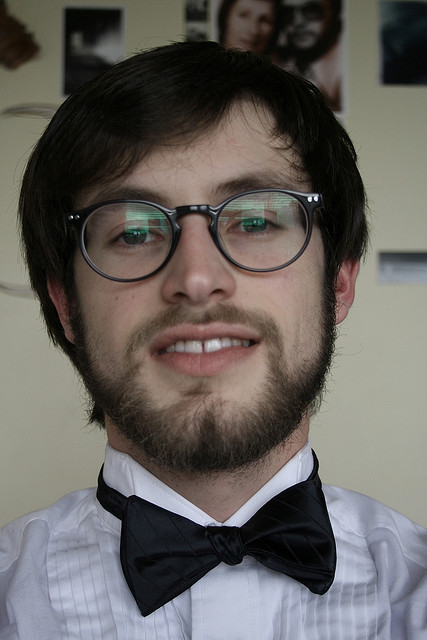

In [79]:
from PIL import Image
x = Image.open("test_images/COCO_test2015_000000000028.jpg")
x

In [ ]:
# from PIL import Image
# import numpy as np

# # Open an image using Pillow
# image = Image.open(x)

# # Convert the image to RGBA mode (4 channels) and fill the alpha channel with zeros
# if image.mode != 'RGBA':
#     image = image.convert('RGBA')

# # Create an alpha channel with zeros
# alpha = Image.new('L', image.size,255)

# # Add the alpha channel to the image
# image.putalpha(alpha)
# image.save('image_with_alpha.png')


In [ ]:
# from PIL import Image

# # Open the RGB image
# rgb_image = Image.open("your_rgb_image.jpg")

# # Convert the RGB image to RGBA by adding an alpha channel
# rgba_image = rgb_image.convert("RGBA")

# # Set the alpha value for the entire image (255 means fully opaque)
# alpha_value = 255

# # Create a transparent image (fully opaque) with the same size as the original
# alpha_layer = Image.new("L", rgba_image.size, alpha_value)

# # Composite the RGB image and the alpha layer to create an RGBA image
# rgba_image = Image.alpha_composite(rgba_image, alpha_layer)

# # Save the resulting image with the alpha channel
# rgba_image.save("output_image.png")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_228894/1367273770.py", line 17, in <module>
    σ
NameError: name 'σ' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1319, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1172, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.

In [ ]:
# rgb_image = dataset['image'][0]
# rgba_image = Image.new("RGBA", rgb_image.size)

# # Set the alpha value for the entire image (255 means fully opaque)
# alpha_value = 255

# for x in range(rgb_image.width):
#     for y in range(rgb_image.height):
#         r, g, b = rgb_image.getpixel((x, y))
#         rgba_image.putpixel((x, y), (r, g, b, alpha_value))

# # Save the resulting image with the alpha channel
# rgba_image.save("output_image.png")
# z = rgba_image



In [ ]:
# #image_captioner(dataset['image'][1])
# image_captioner(rgba_image)

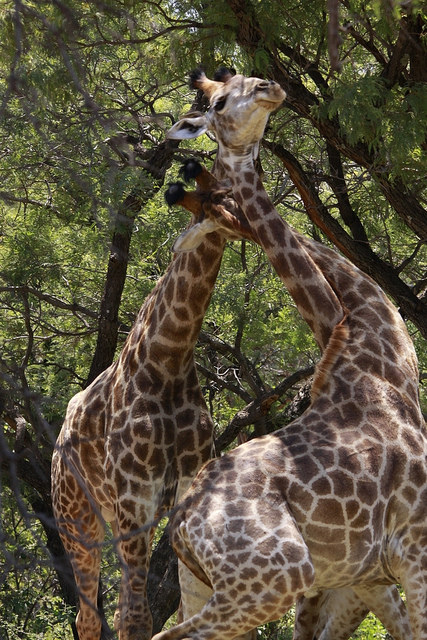

In [ ]:
dataset['image'][9]

In [ ]:
image_captioner(dataset['image'][9])

[{'generated_text': '\n\n'}]

In [ ]:
val_processed_dataset

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_228894/446969552.py", line 1, in <module>
    val_processed_dataset
NameError: name 'val_processed_dataset' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1319, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1172, in structured_traceback
  Fil

In [ ]:
processed_dataset

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_228894/2138079080.py", line 1, in <module>
    processed_dataset
NameError: name 'processed_dataset' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1428, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1319, in structured_traceback
  File "/data1/ViTgpt2/gpt2env/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1172, in structured_traceback
  File "/dat

In [ ]:
# depth_dataset = load_dataset("csv", data_files="/home/vcl3d/coco_dataset_VOX_mini/train2014_csv/COCO_train2014_000000000009.csv")

In [ ]:
# depth_dataset

In [ ]:
# depth_dataset['train']['depth']

In [ ]:
# depth_dataset['train']['Classes']

In [ ]:
dataset

Dataset({
    features: ['image', 'text', 'image_path', 'height', 'width', 'image_id', 'file_name'],
    num_rows: 5000
})